# 활성화 함수의 이해

## 목차

1. 활성화 함수
   * 활성화 함수
   * 퍼셉트론
     * 신경세포의 구조
     * 퍼셉트론의 구조
2. 선형과 비선형
   * 선형
   * 비선형
   * 비선형 함수를 쓰는 이유
     * 그렇다면..(비선형 함수를 쓴다면?)
3. 활성화 함수의 종류
   * 이진 계단 함수
     * 이진 계단 함수의 한계
   * 선형 활성화 함수
     * 선형 활성화 함수의 한계
   * 비선형 활성화 함수
     * 시그모이드/로지스틱
     * 하이퍼볼릭 탄젠트
     * ReLU
     * ReLU의 단점을 극복하기 위한 시도들

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product
import tensorflow as tf
import os

tf.random.set_seed(7879)

### tensorflwo GPU 확인

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-08-17 15:36:30.906180: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-17 15:36:31.597070: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /device:GPU:0 with 6668 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10478364114933524426
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6992625664
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4168747805510464221
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

## Activation function

* 임계치를 넘어가면 활성화, 넘어가지 않으면 비활성화
* 표현력을 향상시켜주기 - 비선형 데이터 사용

## Perceptron

<img src = 'data/Perceptron1.png' width = '30%' height = '30%'>

최종 값을 나오게 하는 f 함수가 활성화 함수

## 선형과 비선형

* 선형 변환 : 공간 상의 벡터를 다른 공간 상의 벡터로 바꿔줌(원점은 동일하고 다 선형이여함.)
* 가산성(Additivity) : 모든 x, y in Vx,y∈V 에 대해, T(x+y) = T(x) + T(y)
* 동차성(Homogeneity) : 모든 x∈V,c∈R 에 대해, T(cx) = cT(x)

## 비선형 함수를 쓰는 이유

* 비선형을 쓰는 이유 : 딥러닝 모델의 표현력을 향상
* 선형의 경우 아무리 서로 다른 w를 곱해도 결국 w 하나만 잘 조절하면 결과가 같다.
* 노드의 개수를 아무리 많이 붙여도 결국 하나의 노드를 쓰는 것과 같다.
* Layer를 아무리 쌓아도 활성화 함수가 선형이라면 표현력은 증가하지 않는다.

## 활성화 함수의 종류

1. 이진 계단 함수(Binary step function)
2. 선형 활성화 함수(Linear activation function)
3. 비선형 활성화 함수(Non-linear activation function)

## 이진 계단 함수

* 특정 임계점을 넘으면 1 아니면 0
* threshold가 있는 함수를 쓰면 꼭 default 값을 설정해주세요

In [3]:
def binary_step(x, threshold=0): 
    return 0 if x < threshold else 1

* 함수 그래프
* 함수의 미분 그래프
* 무작위 샘플들 분포
* 활성화 함수를 통과한 샘플들 분포
* 원본 이미지
* 활성화 함수를 통과한 이미지

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)]
    # X = [ -10, -9.99, - 9.98, ... , 9.99]
    y = [function(y) for y in X]
    
    plt.figure(figsize = (12, 12))
    # 그래프의 크기
    plt.subplot(3,2,1)
    # 3행 2열 그래프와 몇번째 그래프?
    plt.title('function')
    plt.plot(X,y)
    # y= f(x)
    
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    # 따로 해당 함수의 미분 함수가 있다면 그 함수를 출력합니다.
    
    samples = np.random.rand(1000)
    # 0과 1 사이의 난수 천개
    samples -= np.mean(samples)
    # 위의 값 평균
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    # bin 값
    
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    # f(x), bin값
    
    # 구분을 위해 gray-scale해서 확인
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255.
    # 위 어레이의 중앙값 제거
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


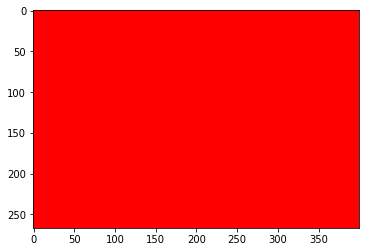

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


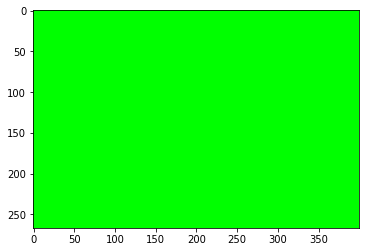

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


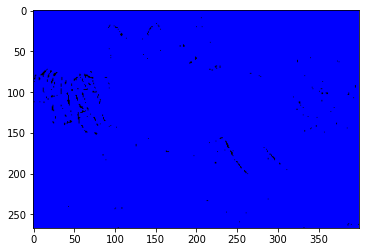

In [40]:
img_path = 'data/jindo_dog.jpg'
image1 = np.array(Image.open(img_path), dtype=np.float64)
image1[:,:,1] = 0
image1[:,:,2] = 0
# image1 -= np.median(image1)
plt.imshow(image1)
plt.show()
image2 = np.array(Image.open(img_path), dtype=np.float64)
# image2 -= np.median(image2)
image2[:,:,0] = 0
image2[:,:,2] = 0
plt.imshow(image2)
plt.show()
image3 = np.array(Image.open(img_path), dtype=np.float64)
# image3 -= np.median(image3)
image3[:,:,0] = 0
image3[:,:,1] = 0
plt.imshow(image3)
plt.show()

* 진돗개 이미지 넣어보기

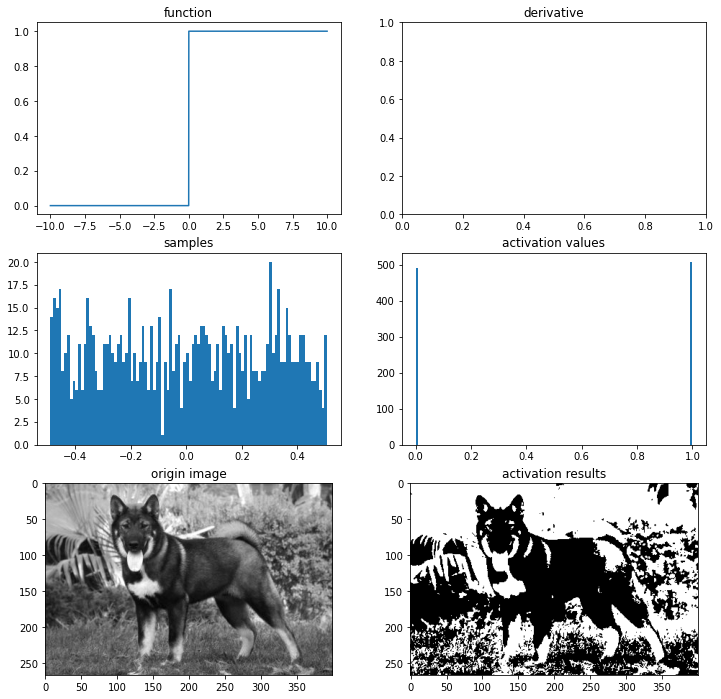

In [6]:
img_path = 'data/jindo_dog.jpg'
ax = plot_and_visulize(img_path, binary_step)
ax.show()

퍼셉트론

In [7]:
class Perceptron(object):
    def __init__(self, input_size, activation_ftn, threshold=0, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold

    def train(self, training_inputs, labels, epochs=100, verbose=1):
        '''
        verbose : 1-매 에포크 결과 출력, 
                  0-마지막 결과만 출력 
        '''
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if verbose == 1:
                pred = self.__call__(training_inputs)
                accuracy = np.sum(pred==labels)/len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
        if verbose == 0:
            pred = self.__call__(training_inputs)
            accuracy = np.sum(pred==labels)/len(pred)
            print(f'{epoch}th epoch, accuracy : {accuracy}')
    
    def get_weights(self):
        return self.weights, self.bias
                
    def __call__(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_ftn(summation, self.threshold)

scatter plot

In [8]:
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax

* np.ma.masked_where : 조건에 해당하는 부분을 masked 처리함.

In [9]:
a = np.arange(4)
print(a)
ma_a = np.ma.masked_where(a <= 2, a)
print(ma_a)
for i in ma_a:
    print(i)

[0 1 2 3]
[-- -- -- 3]
--
--
--
3


* AND gate
* OR gate

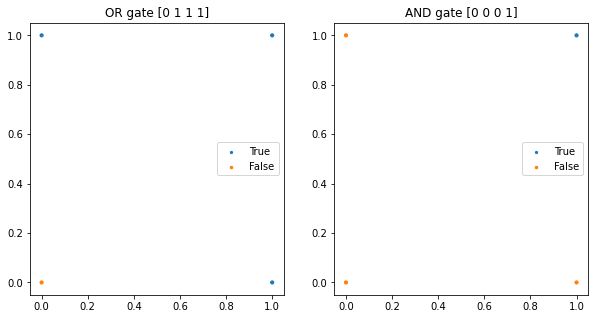

In [10]:
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

* OR gate와 AND gate 를 구현한 단층 퍼셉트론 모델

In [11]:
# OR gate
or_p = Perceptron(input_size=2, activation_ftn=binary_step)
or_p.train(X, or_y, epochs=1000, verbose=0)
print(or_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# AND gate
and_p = Perceptron(input_size=2, activation_ftn=binary_step)
and_p.train(X, and_y, epochs=1000, verbose=0)
print(and_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

999th epoch, accuracy : 1.0
(array([0.78080018, 0.70468943]), array([-0.70412095]))
999th epoch, accuracy : 1.0
(array([0.19478888, 0.00507446]), array([-0.19567926]))


* accuracy가 1.0으로 단층 퍼셉트론 모델로 OR와 AND gate를 구현 가능하다는 것을 확인
* 단층 퍼셉트론 모델의 추론 결과를 시각화
* x,y 축을 100등분한 결과를 모델에 대입 True와 False의 경계선이 선형적으로 드러나도록 그려짐
* 하나의 선으로 문제를 풀 수 있냐를 확인

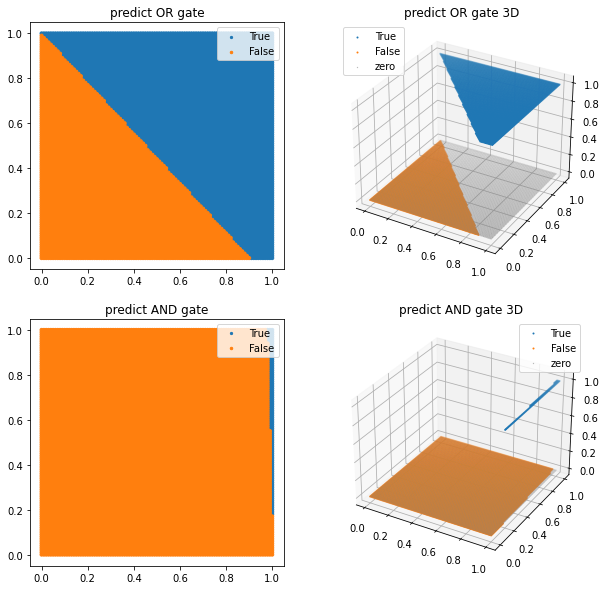

In [12]:
from itertools import product

test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_p(test_X)
pred_and_y = and_p(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, three_d=True)

plt.show()

XOR Gate도 구해보기

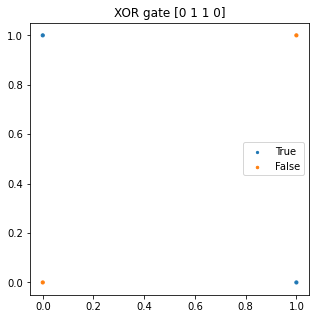

In [13]:
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(5,5))
xor_y = np.array([x1 ^ x2 for x1,x2 in X])
plt.title('XOR gate '+ str(xor_y))
plt = scatter_plot(plt, X, xor_y)
plt.show()

999th epoch, accuracy : 0.5
(array([ 0.00166526, -0.02557295]), array([0.00529748]))


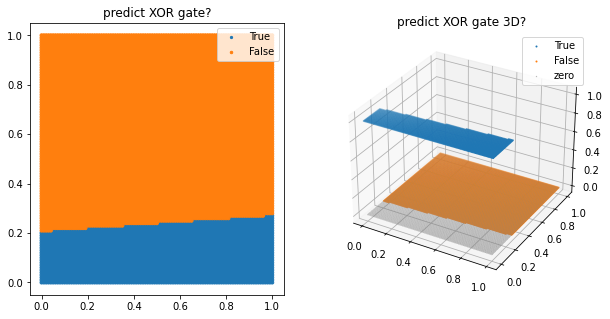

In [14]:
xor_p = Perceptron(input_size=2, activation_ftn=binary_step, threshold=threshold)
xor_p.train(X, xor_y, epochs=1000, verbose=0)
print(xor_p.get_weights())

test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_p(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate?')
ax1 = scatter_plot(ax1, test_X, pred_xor_y)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D?')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, three_d=True)

plt.show()

* accuracy 가 0.5 밖에 안됨.
* 하나의 선으로 구분 못하기 때문
* 이를 해결하기 위해서는 여러 층을 쌓은 다층 퍼셉트론을 사용해야함.
* 하지만 결국 이진 함수는 역전파를 하지못함 : 0이 미분되지 않기 때문 - 가중치 들이 업데이트 되지 않음
* 또한 다중 출력 또한 안됨(0 또는 1)

## 선형 활성화 함수

* 다중 출력 가능
* 간단한 다중 분류 문제 가능
* 미분 가능 - 역전파 가능

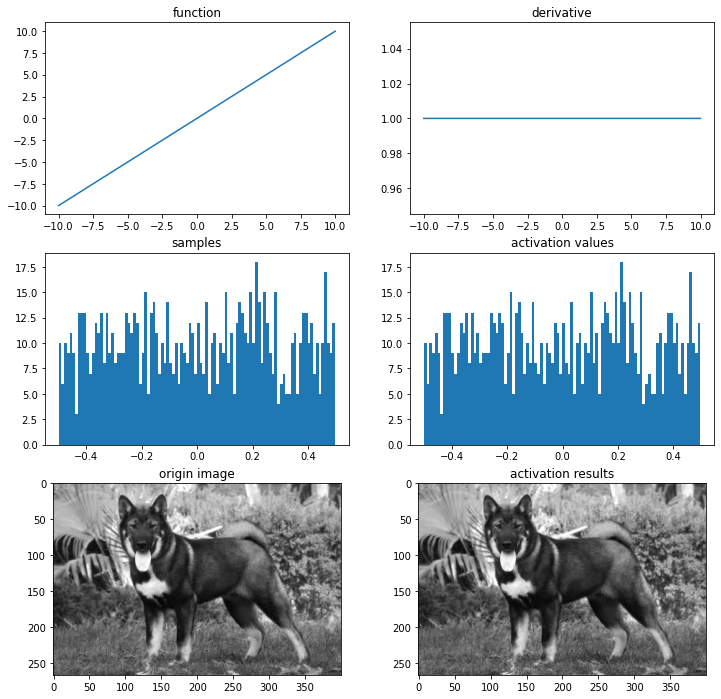

In [15]:
img_path = 'data/jindo_dog.jpg'

def linear(x):
    return x

def dev_linear(x):
    return 1

# 시각화
ax = plot_and_visulize(img_path, linear, dev_linear)
ax.show()

* AND OR gate 가져오기

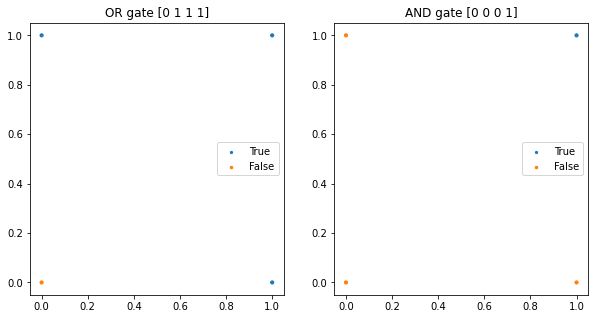

In [16]:
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

In [17]:
# OR gate model
or_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
or_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_linear_model.summary()

# AND gate model
and_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
and_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_linear_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


2022-08-17 15:36:39.550537: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6668 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


In [18]:
or_linear_model.fit(X, or_y, epochs=1000, verbose=0)
and_linear_model.fit(X, and_y, epochs=1000, verbose=0)
print('done')

done


그래프로 그려보기

/home/aiffel/.local/lib/python3.10/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


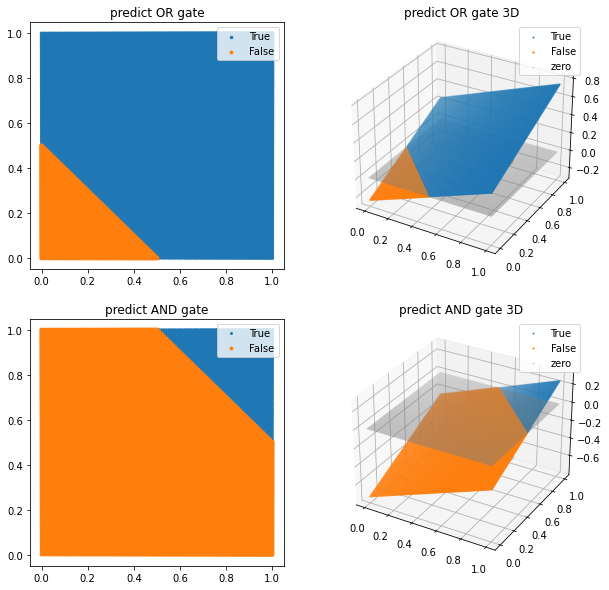

In [19]:
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_linear_model(test_X)
pred_and_y = and_linear_model(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

plt.show()

XOR gate

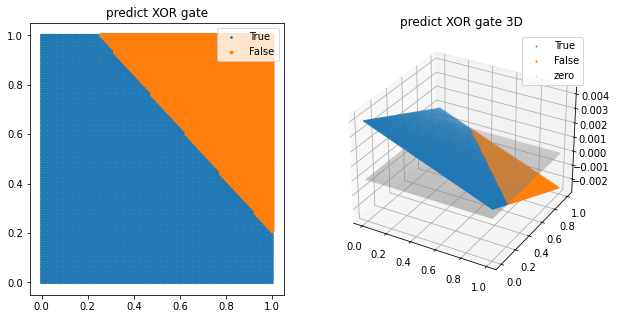

In [20]:
xor_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
xor_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_linear_model.fit(X, xor_y, epochs=1000, verbose=0)

test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_linear_model(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

선 하나로는 나눌 수 없기 때문에 XOR gate는 불가능합니다.

## Sigmoid, Softmax

* σ(x) = 1 / (1 +e<sup>−x</sup>)
* 미분 = σ(x) (1 - σ(x)) 

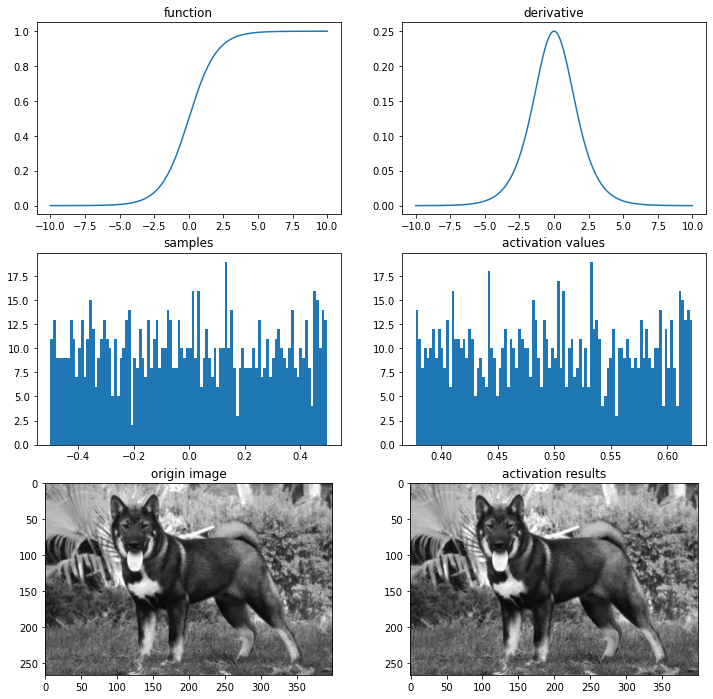

In [21]:
img_path = 'data/jindo_dog.jpg'

def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 시각화
ax = plot_and_visulize(img_path, sigmoid, dev_sigmoid)
ax.show()

수치미분 해보기

In [22]:
def num_derivative(x, function, h = 1e-15 ):
    # h = 1e-15 # 이 값을 바꾸어 가며 그래프를 확인해 보세요
    numerator = function(x+h)-function(x)
    return numerator/h

def diff_graph(h):
    diff_X = [-5+x/100 for x in range(1001)]
    dev_y = np.array([dev_sigmoid(x) for x in diff_X])
    num_dev_y = np.array([num_derivative(x, sigmoid, h) for x in diff_X])

    diff_y = dev_y - num_dev_y
    plt.plot(diff_X, num_dev_y, label='numerical')
    plt.plot(diff_X, dev_y, label='analytic')
    plt.plot(diff_X, diff_y, label='differnce')
    plt.legend()

    plt.show()

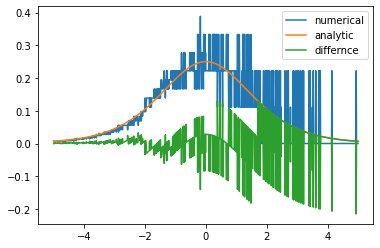

In [23]:
diff_graph(1e-15)

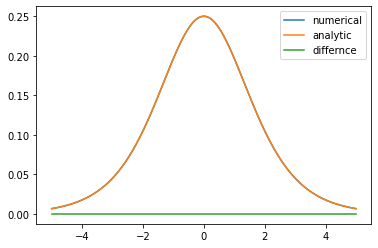

In [24]:
diff_graph(1e-5)

* 단점
1. 포화
   * 포화된다 : 출력이 1에 가까워 갈뿐 1이상으로 높아지지 않는다. 또한 0에 가까워 질뿐 0 이하로 떨어지지 않는다.
   * 포화되면 역전파 할때 그래디언트가 0에 가까워져서 모든 역전파 값이 0에 근접하게되어 사실상 가중치 업데이트가 일어나지 않는다.
   * = kill the gradient
2. 출력의 중심이 0이 아님
   * 훈련 시간이 오래 걸리게 됨

AND OR XOR gate

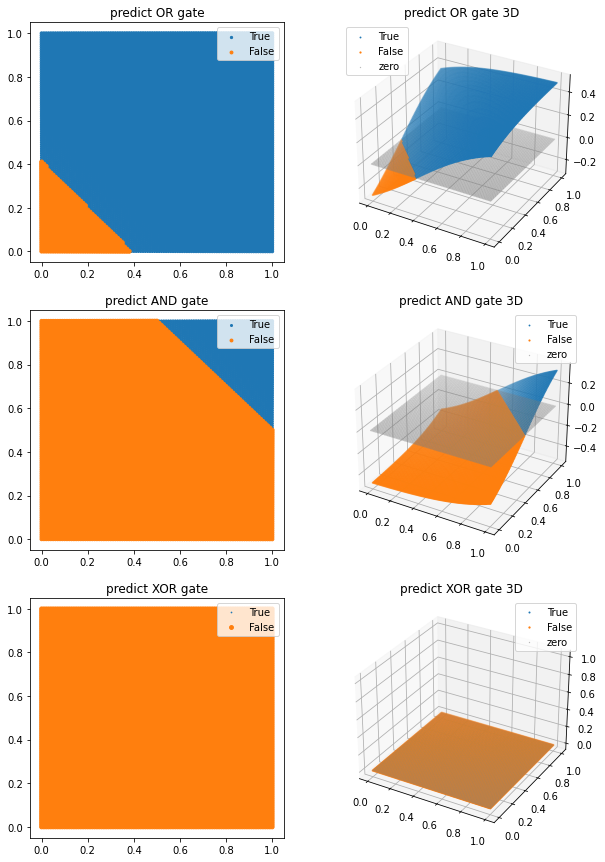

In [25]:
# OR gate
or_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
or_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_sigmoid_model.fit(X, or_y, epochs=1000, verbose=0)

# AND gate
and_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
and_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_sigmoid_model.fit(X, and_y, epochs=1000, verbose=0)

# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_sigmoid_model(test_X)
pred_and_y = and_sigmoid_model(test_X)
pred_xor_y = xor_sigmoid_model(test_X)

plt.figure(figsize=(10,15))
ax1 = plt.subplot(3,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(3,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(3,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(3,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

ax5 = plt.subplot(3,2,5)
ax5.set_title('predict XOR gate')
ax5 = scatter_plot(ax5, test_X, pred_xor_y, threshold=0.5)

ax6 = plt.subplot(3,2,6, projection='3d')
ax6.set_title('predict XOR gate 3D')
ax6 = scatter_plot(ax6, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

* XOR를 제대로 못구함
* Layer를 추가하면 제대로 구할 수 있음

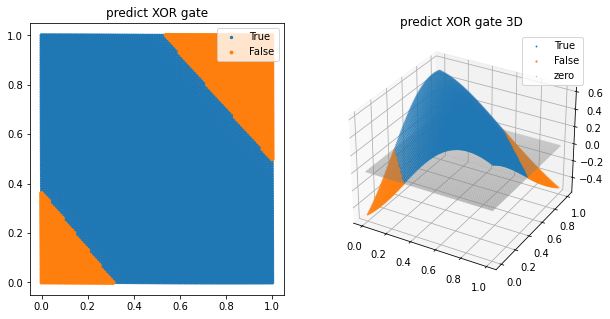

In [26]:
# 레이어를 추가했을 때
# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, activation='sigmoid'), # 2 nodes로 변경
    tf.keras.layers.Dense(1)
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

plt.figure(figsize=(10,5))
pred_xor_y = xor_sigmoid_model(test_X)

ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

softmax는 각 class의 확률을 구할 때 사용

## tanh

* 쌍곡선 함수
* (e<sup>x</sup> -  e<sup>-x</sup>) / (e<sup>x</sup> +  e<sup>-x</sup>)
* 미분 = 1 - tanh<sup>2</sup>(x)
* 중심이 0 : 훈련이 시그모이드 보다 빠름

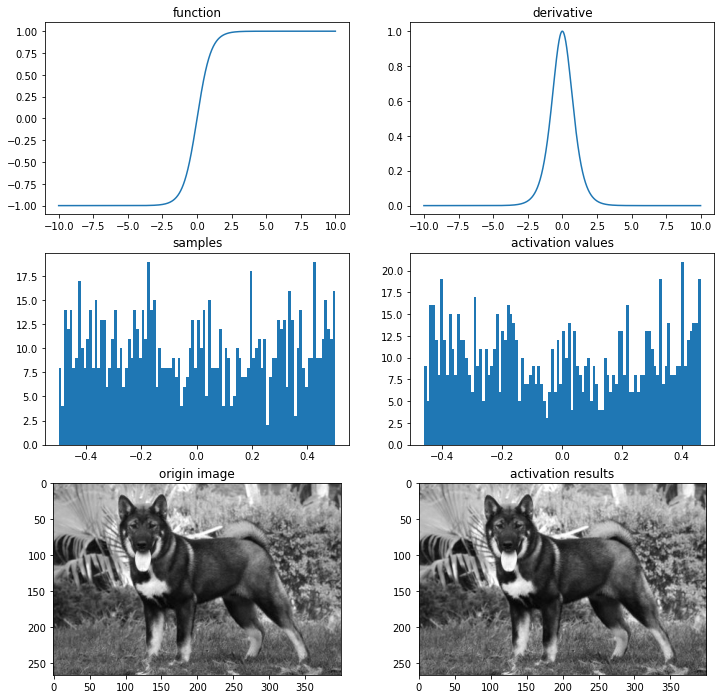

In [27]:
img_path = 'data/jindo_dog.jpg'

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def dev_tanh(x):
    return 1-tanh(x)**2

ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()

단점
* 마찬가지로 -1과 1 에서 포화

## ReLU

* ReLU(rectified linear unit)
* f(x) = max(0, x)
* tanh 보다 훈련 속도가 더 빠름

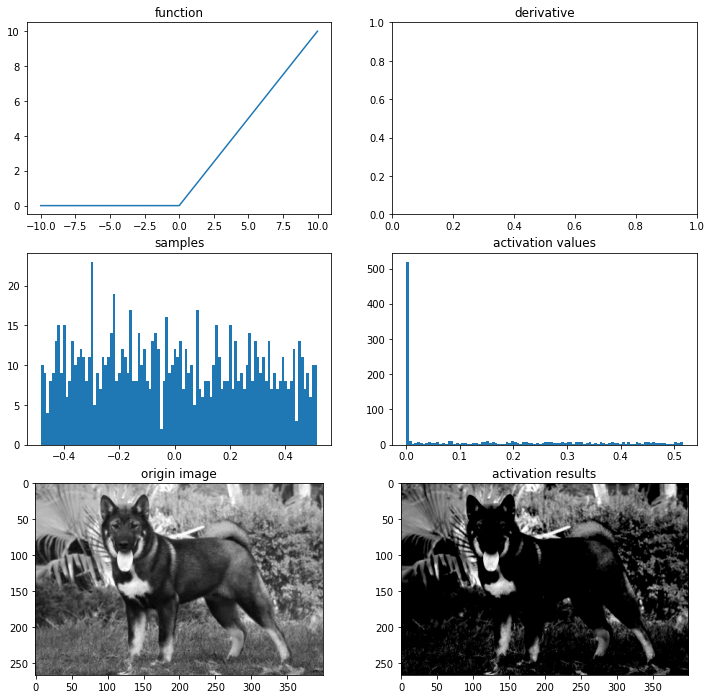

In [28]:
img_path = 'data/jindo_dog.jpg'

def relu(x):
    return max(0,x)

ax = plot_and_visulize(img_path, relu)
ax.show()

ReLU가 곡선이 없는데도 비선형적 데이터 특징을 어떻게 잘 잡아낼까?

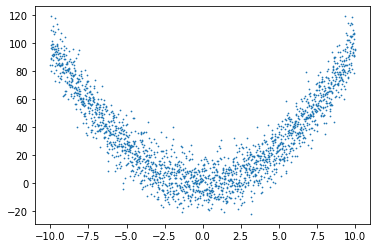

In [29]:
q_X = np.array([-10+x/100 for x in range(2001)])
q_y = np.array([(x)**2 + np.random.randn(1)*10 for x in q_X])
plt.scatter(q_X, q_y, s=0.5)

In [30]:
# 병렬 연결
approx_relu_model_p = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(6, activation='relu'), # 6 nodes 병렬 연결
    tf.keras.layers.Dense(1)
])
approx_relu_model_p.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_p.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

# 직렬 연결
approx_relu_model_s = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2, activation='relu'),# 2 nodes 직렬로 3번 연결
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
approx_relu_model_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_s.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_p.summary()
approx_relu_model_s.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 12        
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 4         
                                                                 
 dense_11 (Dense)            (None, 2)                 6         
                                                                 
 dense_12 (Dense)            (None, 

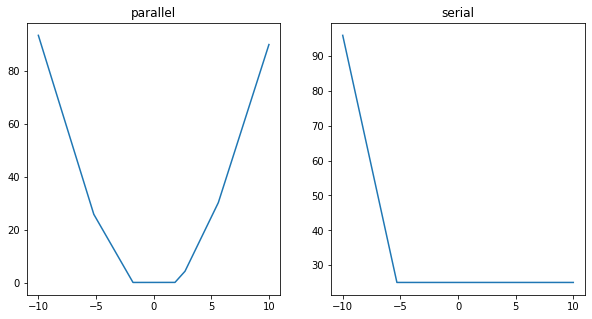

In [31]:
q_test_X = q_X.reshape((*q_X.shape,1))
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1.set_title('parallel')
pred_y_p = approx_relu_model_p(q_test_X)
ax1.plot(q_X, pred_y_p)

ax2 = plt.subplot(1,2,2)
ax2.set_title('serial')
pred_y_s = approx_relu_model_s(q_test_X)
ax2.plot(q_X, pred_y_s)

plt.show()

* 단점
  1. 출력값의 중심이 0이 아님
  2. Dying ReLU : ReLU를 사용한 노드가 비활성화되며 출력을 0으로만 하는 것 
    - 가중치 값에 의해 x와 상관없이 0이하로 나오면 계속 gradient가 0이 되어서 가중치 업데이트가 일어나지 않음
    - 노드의 출력값과 그래디언트가 0이 되어 노드가 죽어버림.
    - 학습률을 크게 잡을때 자주 발생 - 학습률을 줄여주면 어느정도 해소

## ReLU 단점 극복 시도

### Leaky ReLU

* Dying ReLU 해결 시도

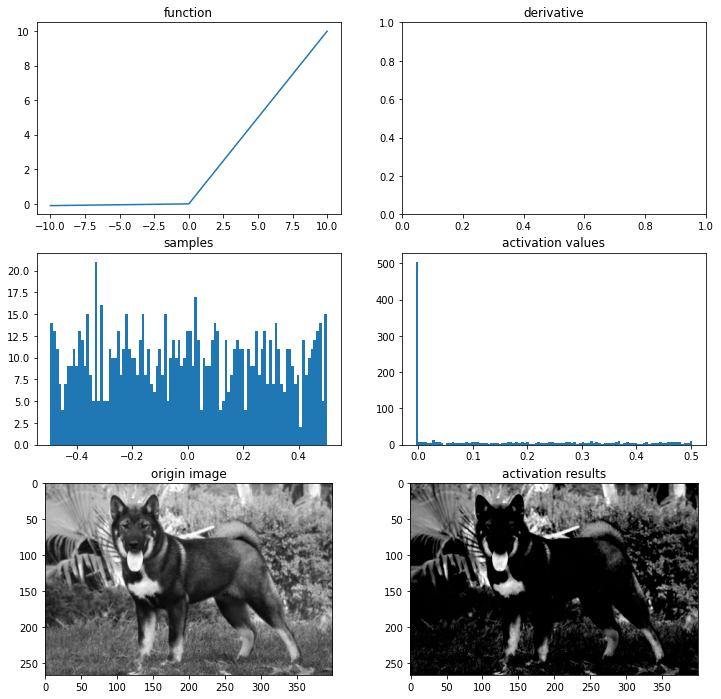

In [32]:
img_path = 'data/jindo_dog.jpg'

def leaky_relu(x):
    return max(0.01*x,x)

ax = plot_and_visulize(img_path, leaky_relu)
ax.show()

0 대신 매우 작은 값을 출력하게 바꿈

### PReLU

* Leaky ReLU와 유사하지만 새로운 파라미터를 추가하여 0 미만일 때의 '기울기'가 훈련되게 했습니다.
* alpha 가 훈련 과정에서 업데이트됨

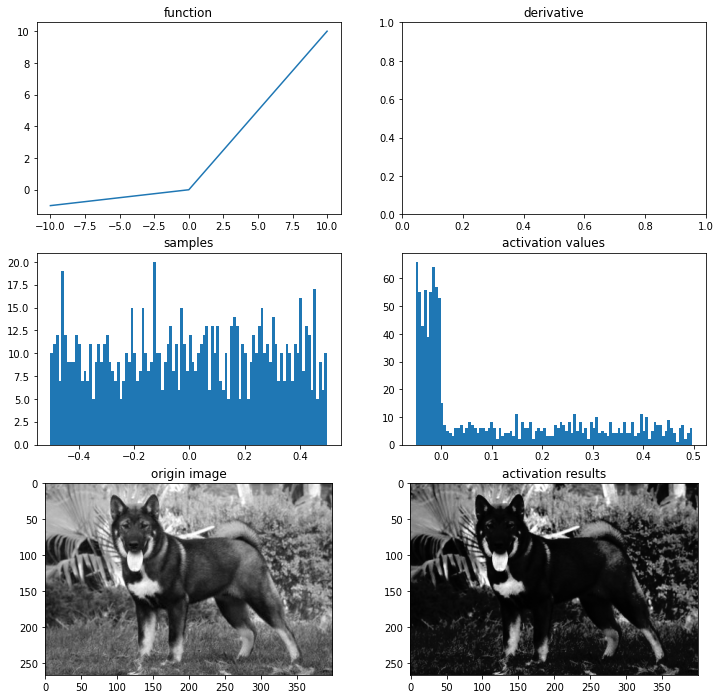

In [33]:
def prelu(x, alpha):
    return max(alpha*x,x)

ax = plot_and_visulize(img_path, lambda x: prelu(x, 0.1)) # parameter alpha=0.1일 때

ax.show()

### ELU

* ELU(exponential linear unit)은 ReLU의 모든 장점을 포함하며, 0이 중심점이 아니었던 단점과, 'Dying ReLU'문제를 해결한 활성화 함수입니다.

f(x)
* if x > 0
  - x
* if x <= 0
  - alpha(e<sup>x</sup> - 1)

f'(x)
* if x > 0
  - 1
* if x <= 0
  - f(x) + alpha

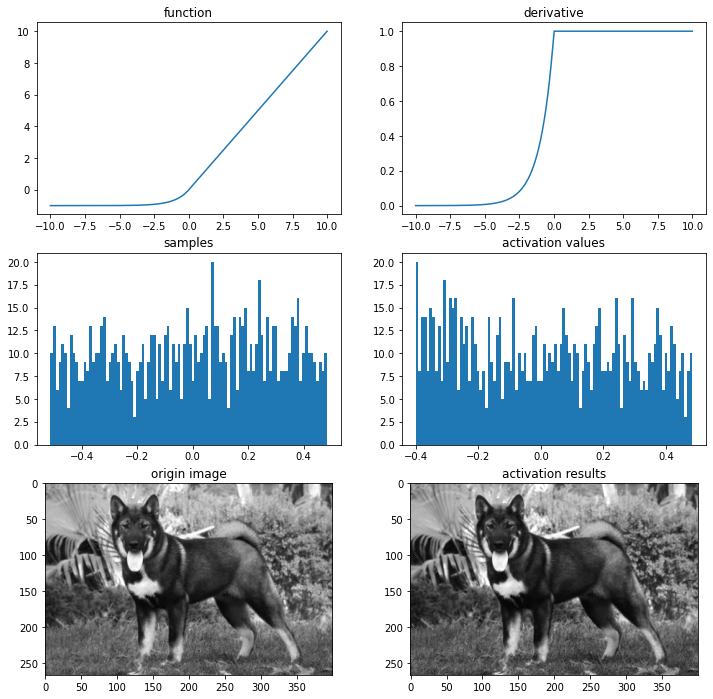

In [34]:
def elu(x, alpha):
    return x if x > 0 else alpha*(np.exp(x)-1)

def dev_elu(x, alpha):
    return 1 if x > 0 else elu(x, alpha) + alpha

ax = plot_and_visulize(img_path, lambda x: elu(x, 1), lambda x: dev_elu(x, 1)) # alpha가 1일 때
ax.show()

단점
* exponential 연산이 들어가서 계산 비용이 높아졌다는 점이 있습니다.